### Ход выполнения проекта

- Опишите цели исследования
- Исследуйте данные
- Требуется ли преобразование типов?
- Присутствуют ли пропущенные значения и дубликаты? Если да, то какова их природа?
- Проведите исследовательский анализ данных
- Исследуйте конверсию в воронке на разных этапах?
- Обладают ли выборки одинаковыми распределениями количества событий на пользователя?
- Присутствуют ли в выборках одни и те же пользователи?
- Как число событий распределено по дням?
- Подумайте, есть ли какие-то нюансы данных, которые нужно учесть, прежде чем приступать к A/B-тестированию?
- Проведите оценку результатов A/B-тестирования
- Что можно сказать про результаты A/A-тестирования?
- Проверьте статистическую разницу долей z-критерием
- Опишите выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования

### Шаг 1. Откроем файлы с данными и изучим общую информацию.

In [1]:
#!pip install plotly

In [2]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = "svg"
from warnings import simplefilter

In [3]:
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=RuntimeWarning)

In [4]:
marketing_events = pd.read_csv('ab_project_marketing_events.csv')
marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [5]:
new_users = pd.read_csv('final_ab_new_users.csv')
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [6]:
events = pd.read_csv('final_ab_events.csv')
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [7]:
ab_participants = pd.read_csv('final_ab_participants.csv')
ab_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [8]:
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null object
finish_dt    14 non-null object
dtypes: object(4)
memory usage: 576.0+ bytes


In [9]:
marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [10]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null object
region        61733 non-null object
device        61733 non-null object
dtypes: object(4)
memory usage: 1.9+ MB


In [11]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null object
event_name    440317 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [12]:
ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB


Первый взгляд на данные дает следующую информацию:

- Необходимо привести столбцы с датами к правильному типу
- В таблице events примерно у 1/7 из числа строк есть данные в столбце details
- Название столбца details лучше заменить на purchase
- Возможно, столбец ab_test в таблице ab_participants является лишним

### Шаг 2. Подготовка данных

In [13]:
date_columns = ['start_dt', 'finish_dt']
for col in date_columns:
    marketing_events[col] = pd.to_datetime(marketing_events[col])
marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [14]:
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null datetime64[ns]
finish_dt    14 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [15]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null datetime64[ns]
region        61733 non-null object
device        61733 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


In [16]:
events['event_dt'] = pd.to_datetime(events['event_dt'])
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null datetime64[ns]
event_name    440317 non-null object
details       62740 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


In [17]:
ab_participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

Очевидно, у нас есть два различных теста и, возможно, пользователи, попавшие в оба теста. Нам придется избавиться от всех пользователей, попавших в группу второго теста, даже если они также попали в группу целевого теста, поскольку такое совмещение искажает результаты теста.

In [18]:
events['details'].unique()

array([ 99.99,   9.99,   4.99, 499.99,    nan])

Очевидно, что это платежи и название столбца не отражает его суть

In [19]:
columns = ['user_id', 'event_dt', 'event_name', 'purchase']
events.set_axis(columns, axis = 'columns', inplace = True)
events.head()

,user_id,event_dt,event_name,purchase
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [20]:
events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [21]:
events['event_dt'].describe()

count                  440317
unique                 267268
top       2020-12-23 02:37:24
freq                       10
first     2020-12-07 00:00:33
last      2020-12-30 23:36:33
Name: event_dt, dtype: object

In [22]:
new_users['first_date'].describe()

count                   61733
unique                     17
top       2020-12-21 00:00:00
freq                     6290
first     2020-12-07 00:00:00
last      2020-12-23 00:00:00
Name: first_date, dtype: object

Несмотря на то, что по имеющимся данным тест был остановлен 4 января, никаких событий позднее 30 декабря не зарегистрировано. Также надо отметить, что в выборке оказались пользователи, зарегистрировавшиеся позже даты остановки набора новых пользователей. Это лишние данные, условиям задачи они не удовлетворяют, от них придется избавиться.

Период проведения теста - с 7.12.20 по 4.01.21, по 14 дней на две части теста. Во-первых, это само по себе не лучшее время для проведения А/В тестирования, поскольку выпадает на предновогодние дни и захватывает сам новый год. Во-вторых, если в это время проводились какие-то маркетинговые активности (а их отсутствие было бы странно), они также могут исказить результаты теста.

In [23]:
marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [24]:
marketing_events.query('start_dt < "2021-01-04" and finish_dt > "2020-12-07"')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


Итак, на время проведения теста выпали сразу две маркетинговые активности, которые еще и пересекаются между собой. Более того, обе начались после даты остановки набора новых пользователей и, следовательно, точно исказили результаты теста.

Уберем из анализа пользователей, зарегистрировавшихся позже плановой даты - 2020-12-21.

In [25]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null datetime64[ns]
region        61733 non-null object
device        61733 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


In [26]:
new_users = new_users.query('first_date <= "2020-12-21"')
new_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56470 entries, 0 to 61732
Data columns (total 4 columns):
user_id       56470 non-null object
first_date    56470 non-null datetime64[ns]
region        56470 non-null object
device        56470 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 2.2+ MB


Потеряли порядка 5000 строк из 61000, около 8%

In [27]:
new_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [28]:
events.isna().sum()

user_id            0
event_dt           0
event_name         0
purchase      377577
dtype: int64

Из 440317 записей 377577 не связаны с финансовыми операциями, то есть это просто серфинг по магазину. Можно заменить Nan на нули.

In [29]:
events = events.fillna(0)
events.isna().sum()

user_id       0
event_dt      0
event_name    0
purchase      0
dtype: int64

In [30]:
ab_participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [31]:
events.duplicated().sum()

0

In [32]:
new_users.duplicated().sum()

0

In [33]:
ab_participants.duplicated().sum()

0

Теперь нужно проверить, есть ли пользователи, попавшие в оба теста, и убрать из анализа этих пользователей, а также тест, результаты которого нас по условиям задачи не интересуют.

In [34]:
users_system_test = ab_participants.query('ab_test == "recommender_system_test"')
users_system_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6701 entries, 0 to 6700
Data columns (total 3 columns):
user_id    6701 non-null object
group      6701 non-null object
ab_test    6701 non-null object
dtypes: object(3)
memory usage: 209.4+ KB


In [35]:
users_interface_test = ab_participants.query('ab_test == "interface_eu_test"')
users_interface_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11567 entries, 6701 to 18267
Data columns (total 3 columns):
user_id    11567 non-null object
group      11567 non-null object
ab_test    11567 non-null object
dtypes: object(3)
memory usage: 361.5+ KB


In [36]:
len(ab_participants['user_id'].unique())

16666

Уникальных пользователей в исходной выборке 16 666, а записей в таблице 18 268, то есть налицо 1 602 пересечения.

In [37]:
intersect = users_system_test.merge(users_interface_test, on = 'user_id', how = 'left')
intersect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6701 entries, 0 to 6700
Data columns (total 5 columns):
user_id      6701 non-null object
group_x      6701 non-null object
ab_test_x    6701 non-null object
group_y      1602 non-null object
ab_test_y    1602 non-null object
dtypes: object(5)
memory usage: 314.1+ KB


In [38]:
participants = intersect.query('ab_test_y != "interface_eu_test"')
participants = participants[['user_id', 'group_x', 'ab_test_x']]
participants.head()

,user_id,group_x,ab_test_x
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
5,4FF2998A348C484F,A,recommender_system_test
6,7473E0943673C09E,A,recommender_system_test


In [39]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5099 entries, 0 to 6700
Data columns (total 3 columns):
user_id      5099 non-null object
group_x      5099 non-null object
ab_test_x    5099 non-null object
dtypes: object(3)
memory usage: 159.3+ KB


Осталось 5099 уникальных пользователей, которые приняли участие в рассматриваемом тесте. До ожидаемого числа участников (6000) это значение не дотягивает  не хватает 901 пользователя, или 15%. Немало.

In [40]:
part_columns = ['user_id', 'group']
participants = participants[['user_id', 'group_x']]
participants.set_axis(part_columns, axis = 'columns', inplace = True)
participants.head()

,user_id,group
0,D1ABA3E2887B6A73,A
1,A7A3664BD6242119,A
4,482F14783456D21B,B
5,4FF2998A348C484F,A
6,7473E0943673C09E,A


На этом этапе данные приведены к виду, пригодному для дальнейшей обработки. Там, где нужно, изменены типы данных (а именно столбцы с датами). Обработаны пропуски. Из рассмотрения исключены данные, не удовлетворяющие условиям теста. В принципе, уже на этой стадии тест можно признать неудачным, поскольку:

- он был запущен под новый год, что само по себе искажает результаты теста;
- на период проведения теста выпало разом две маркетинговые активности, поэтому невозможно точно установить, что именно повлияло на поведение пользователей: проверяемые тестом условия или акции на сайте;
- одновременно с этим тестом проводился еще один, и 1602 пользователя угодили в обе выборки, что тоже искажает результаты - причем обоих тестов;
- часть пользователей попала в тест после даты формальной остановки набора новых пользователей;
- в результатах теста попросту отсутствуют данные за последние пять дней теста, что делает тест неполным;
- число пользователей, участвовавших в тесте, ниже требуемого на 15%.

### Исследовательский анализ данных

Проверим утверждение из техзадания про 15% новых пользователей из EU. Для начала выясним, сколько у нас в целом пользователей из EU

In [41]:
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [42]:
new_users['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

In [43]:
len(new_users[new_users['region'] == 'EU']['user_id'].unique())

42340

In [44]:
events.head()

,user_id,event_dt,event_name,purchase
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


Подобъем данные в единый датафрейм.

In [45]:
df_ext = events.merge(new_users, on = 'user_id', how = 'left')
df = df_ext.merge(participants, on = 'user_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18804 entries, 0 to 18803
Data columns (total 8 columns):
user_id       18804 non-null object
event_dt      18804 non-null datetime64[ns]
event_name    18804 non-null object
purchase      18804 non-null float64
first_date    18804 non-null datetime64[ns]
region        18804 non-null object
device        18804 non-null object
group         18804 non-null object
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 1.3+ MB


In [46]:
len(df['user_id'].unique())

2788

In [47]:
df.head()

,user_id,event_dt,event_name,purchase,first_date,region,device,group
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android,A
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-07,EU,Android,A
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,2020-12-07,EU,Android,A
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,2020-12-07,EU,Android,A
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,2020-12-07,EU,Android,A


In [48]:
users_region_test = (df
                     .drop_duplicates('user_id')
                     .groupby('region')
                     .agg({'user_id': 'count'})
                     .reset_index()
                    )
users_region_test.columns = ['region', 'test_user_id']
users_region_test

,region,test_user_id
0,APAC,45
1,CIS,30
2,EU,2594
3,N.America,119


In [49]:
all_users = new_users['region'].value_counts().to_frame().reset_index()
all_users.columns = ['region', 'all_user_id']
all_users

,region,all_user_id
0,EU,42340
1,N.America,8347
2,CIS,2900
3,APAC,2883


In [50]:
region = users_region_test.merge(all_users, on = 'region', how = 'left')
region

,region,test_user_id,all_user_id
0,APAC,45,2883
1,CIS,30,2900
2,EU,2594,42340
3,N.America,119,8347


In [51]:
region['percent'] = (region['test_user_id'] / region['all_user_id'] * 100).round(1)
region

,region,test_user_id,all_user_id,percent
0,APAC,45,2883,1.6
1,CIS,30,2900,1.0
2,EU,2594,42340,6.1
3,N.America,119,8347,1.4


Увы, в ходе теста не удалось заполучить 15% новых пользователей из EU. Доля новых пользователей, попавших в тестовую выборку из региона EU, составляет чуть более шести %. Таким образом, и по этому критерию тест также нельзя назвать успешным: полученные в его результате данные не релевантны техзаданию.

In [52]:
len(df[df['group'] == 'A']['user_id'].unique())

2082

In [53]:
len(df[df['group'] == 'B']['user_id'].unique())

706

В группах А и В нет общих пользователей - уже хорошо.

In [54]:
df['event_name'].unique()

array(['purchase', 'product_cart', 'login', 'product_page'], dtype=object)

Система отслеживает четыре типа событий: вход на сайт по имени пользователя и паролю, страница продукта, добавление продукта в корзину и, наконец, покупка.

In [55]:
event_freq = (df
              .pivot_table(index='event_name', values = 'user_id', aggfunc='count')
              .reset_index()
              .sort_values(by='user_id', ascending=False)
              .reset_index(drop=True)
             )
event_freq

,event_name,user_id
0,login,8501
1,product_page,5298
2,product_cart,2522
3,purchase,2483


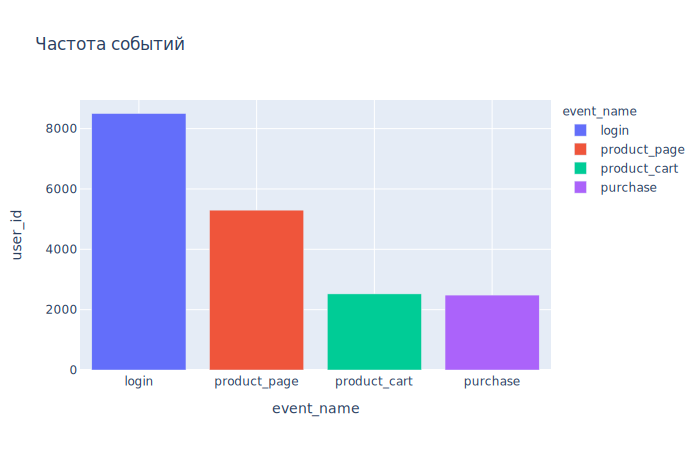

In [56]:
fig = px.bar(event_freq, x='event_name', y='user_id', color='event_name', title='Частота событий')
fig.update_xaxes()

Пока все выглядит очень логично, число совершения событий уменьшается по мере перехода от логина к покупке. 

In [57]:
event_users = (df
               .groupby(['event_name'])['user_id'].agg({'user_id': ['count','nunique']})
               .reset_index()
              )
event_users

event_name user_id        
                  count nunique
0         login    8501    2788
1  product_cart    2522     826
2  product_page    5298    1757
3      purchase    2483     850

In [58]:
event_users.set_axis(['event_name', 'count', 'nunique'], axis = 'columns',inplace = True)
event_users = (event_users
               .sort_values(by='nunique', ascending=False)
               .reset_index(drop=True)
              )
event_users

,event_name,count,nunique
0,login,8501,2788
1,product_page,5298,1757
2,purchase,2483,850
3,product_cart,2522,826


Интересно, что уникальных пользователей, добравшихся до отправки товара в корзину, меньше, чем тех, кто товар купил. Возможно, на сайте есть функция "оформления заказа в один клик", минуя корзину. 

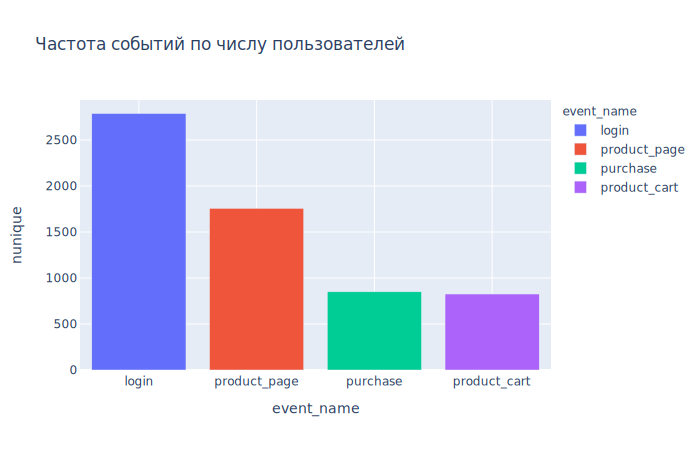

In [59]:
fig = px.bar(event_users, x='event_name', y='nunique', color='event_name', title='Частота событий по числу пользователей')
fig.update_xaxes()
fig.show("svg")

In [60]:
event_users['rate'] = (event_users['nunique'] / len(df['user_id'].unique()) * 100).round(1)
event_users

,event_name,count,nunique,rate
0,login,8501,2788,100.0
1,product_page,5298,1757,63.0
2,purchase,2483,850,30.5
3,product_cart,2522,826,29.6


Из числа залогинившихся на сайте 63% просматривали товары, 30,5% купили товары и чуть менее 30% что-то добавляли в корзину. Откровенно говоря, такая воронка не слишком информативна. Если действительно есть функция покупки в 1 клик, то нужен флаг, чтобы изучить воронку для тех, кто оформлял заказ через корзину, и для тех, кто воспользовался упрощенным способом.

In [61]:
event_users['ratio'] = ''

In [62]:
def ratio(row):
    event_users.loc[0, 'ratio'] = 100
    for i in [0, 1, 2]:
        ratio = ((event_users.loc[(i+1), 'nunique'] / event_users.loc[i, 'nunique']) * 100).round(1)
        event_users.loc[(i+1), 'ratio'] = ratio
    return row

In [63]:
event_users = event_users.apply(ratio)
event_users

,event_name,count,nunique,rate,ratio
0,login,8501,2788,100.0,100
1,product_page,5298,1757,63.0,63
2,purchase,2483,850,30.5,48.4
3,product_cart,2522,826,29.6,97.2


In [64]:
event_users['retention_rate'] = ''

In [65]:
def retention_rate(row):
    event_users.loc[0, 'retention_rate'] = 100
    for i in [0, 1, 2]:
        retention_rate = ((event_users.loc[(i+1), 'nunique'] / event_users.loc[0, 'nunique']) * 100).round(1)
        event_users.loc[(i+1), 'retention_rate'] = retention_rate
    return row

In [66]:
event_users = event_users.apply(retention_rate)
event_users

,event_name,count,nunique,rate,ratio,retention_rate
0,login,8501,2788,100.0,100,100
1,product_page,5298,1757,63.0,63,63
2,purchase,2483,850,30.5,48.4,30.5
3,product_cart,2522,826,29.6,97.2,29.6


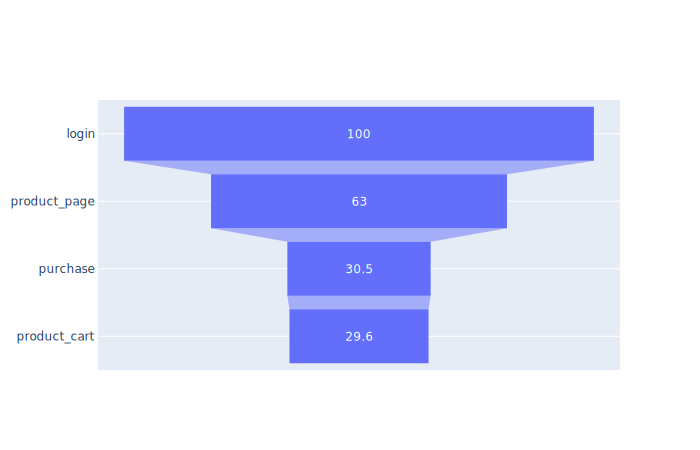

In [67]:
fig = go.Figure(go.Funnel(x=event_users['rate'], y=event_users['event_name']))
fig.show("svg")

In [68]:
df['group'].unique()

array(['A', 'B'], dtype=object)

In [69]:
a_funnel = (df[df['group'] == 'A']
               .groupby(['event_name'])['user_id'].agg({'user_id': ['count','nunique']})
               .reset_index()
              )
a_funnel.set_axis(['event_name', 'count', 'nunique'], axis = 'columns',inplace = True)
a_funnel = (a_funnel
               .sort_values(by='nunique', ascending=False)
               .reset_index(drop=True)
              )
a_funnel['rate'] = (a_funnel['nunique'] / len(df[df['group'] == 'A']['user_id'].unique()) * 100).round(1)
a_funnel['group'] = 'A'
a_funnel

,event_name,count,nunique,rate,group
0,login,6525,2082,100.0,A
1,product_page,4250,1360,65.3,A
2,purchase,1973,652,31.3,A
3,product_cart,1989,631,30.3,A


In [70]:
b_funnel = (df[df['group'] == 'B']
               .groupby(['event_name'])['user_id'].agg({'user_id': ['count','nunique']})
               .reset_index()
              )
b_funnel.set_axis(['event_name', 'count', 'nunique'], axis = 'columns',inplace = True)
b_funnel = (b_funnel
               .sort_values(by='nunique', ascending=False)
               .reset_index(drop=True)
              )
b_funnel['rate'] = (b_funnel['nunique'] / len(df[df['group'] == 'B']['user_id'].unique()) * 100).round(1)
b_funnel['group'] = 'B'
b_funnel

,event_name,count,nunique,rate,group
0,login,1976,706,100.0,B
1,product_page,1048,397,56.2,B
2,purchase,510,198,28.0,B
3,product_cart,533,195,27.6,B


In [71]:
funnel = pd.concat([a_funnel, b_funnel], axis=0)
funnel

,event_name,count,nunique,rate,group
0,login,6525,2082,100.0,A
1,product_page,4250,1360,65.3,A
2,purchase,1973,652,31.3,A
3,product_cart,1989,631,30.3,A
0,login,1976,706,100.0,B
1,product_page,1048,397,56.2,B
2,purchase,510,198,28.0,B
3,product_cart,533,195,27.6,B


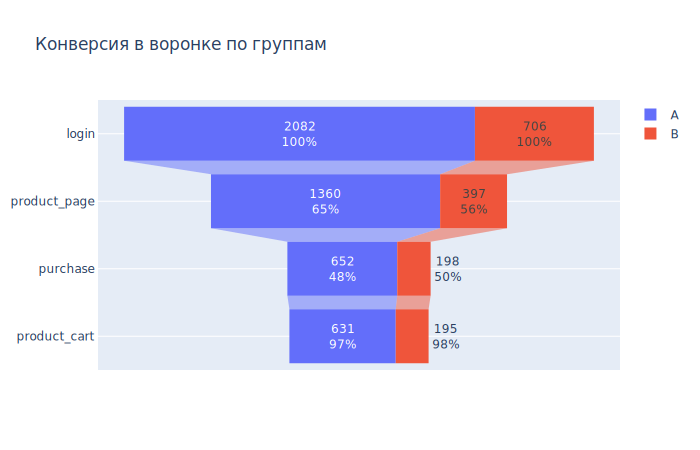

In [72]:
fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'A',
    y = a_funnel['event_name'],
    x = a_funnel['nunique'],
    textinfo = "value+percent previous"))
fig.add_trace(go.Funnel(
    name = 'B',
    y = b_funnel['event_name'],
    x = b_funnel['nunique'],
    textinfo = "value+percent previous"))
fig.update_layout(
    title="Конверсия в воронке по группам"
    )
fig.show("svg")

В группе А 2082 уникальных пользователя, а в группе В 706, почти втрое меньше. По этому показателю тест также выглядит ненадежным. Также запланированный ожидаемый эффект  - не менее 10% улучшения на каждом этапе воронки. По итогам теста же видно, что на этапе перехода от логина к просмотру товаров группа В ведет себя даже хуже, чем группа А - почти на те же 10 %. На следующих этапах воронки есть незначительные улучшения - порядка 1-2 %. До покупки же из группы А добрались 31,3%, а из группы В - 28% от изначально залогинившихся. Таким образом, ожидаемого эффекта теста достигнуть не удалось, даже если не принимать во внимание изначально не релевантные данные.

In [73]:
df['date'] = df['event_dt'].dt.strftime('%Y-%m-%d')
df.head()

,user_id,event_dt,event_name,purchase,first_date,region,device,group,date
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android,A,2020-12-07
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-07,EU,Android,A,2020-12-09
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,2020-12-07,EU,Android,A,2020-12-07
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,2020-12-07,EU,Android,A,2020-12-08
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,2020-12-07,EU,Android,A,2020-12-09


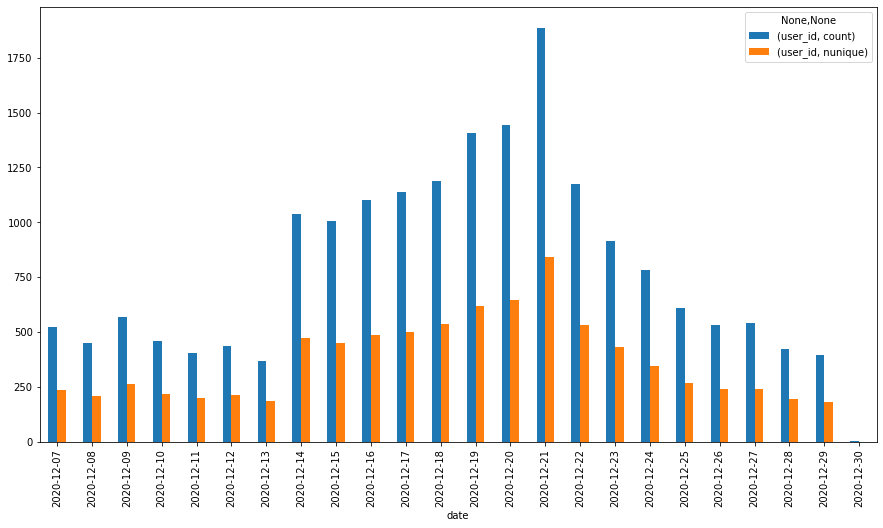

In [74]:
df.groupby('date').agg({'user_id': ['count','nunique']}).plot(kind='bar', figsize=(15, 8))
plt.show()

Временной диапазон теста можно условно разбить на четыре периода. В первую неделю происходило около 500 событий в день, во вторую это число превысило тысячу в день с пиком почти в 2000 21 декабря. В третью неделю наблюдается устойчивый спад (уже 30 декабря почти ничего не происходило), а четвертая неделя оказалась полностью лишена событий.

<Figure size 1080x576 with 0 Axes>

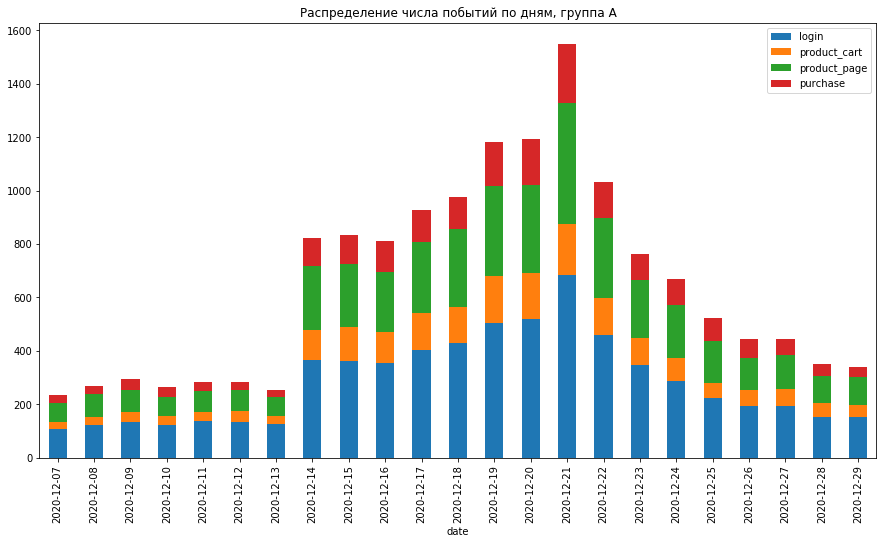

In [75]:
plt.figure(figsize=(15, 8))

(df[df['group'] == 'A']
    .groupby(['date','event_name'])
    .agg({'user_id': ['count']})
    .unstack().fillna(0)
    .plot(kind='bar',stacked=True, figsize=(15, 8), title = 'Распределение числа побытий по дням, группа А')
)
plt.legend(['login', 'product_cart', 'product_page', 'purchase'], prop={'size':10})
plt.show()

<Figure size 1080x576 with 0 Axes>

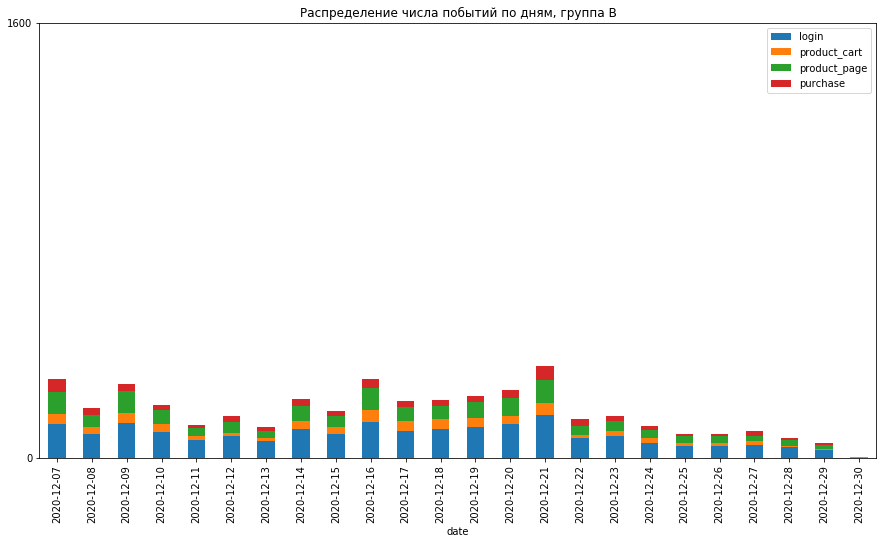

In [76]:
plt.figure(figsize=(15, 8))

(df[df['group'] == 'B']
    .groupby(['date','event_name'])
    .agg({'user_id': ['count']})
    .unstack().fillna(0)
    .plot(kind='bar',stacked=True, figsize=(15, 8), yticks = (0, 1600), title = 'Распределение числа побытий по дням, группа В')
)
plt.legend(['login', 'product_cart', 'product_page', 'purchase'], prop={'size':10})
plt.show()

На графиках распределения событий для каждой группы видно, насколько меньше событийно группа В. Кроме того, очевидно, что в ней распределение числа событий по дням сильно отличается от группы А как в целом, так и по каждому событию в частности.

### Оценка результатов А/В тестирования

Про АА-тест сказать ничего дельного нельзя. Явного выделения двух групп для корректного проведения АА-теста нет, выделять их постфактум будет некорректно.

Проведем z-тест для групп А и В. Нулевая гипотеза: доли пользователей в группах А и В ведут себя одинаково. Гипотеза Н1: между поведением пользователей из групп А и В есть статистически значимая разница.

In [77]:
alpha = .05
successes_ab = np.array([a_funnel.loc[2, 'nunique'], b_funnel.loc[2, 'nunique']])
trials_ab = np.array([a_funnel.loc[0, 'nunique'], b_funnel.loc[0, 'nunique']])
pa = successes_ab[0]/trials_ab[0] # пропорция успехов в группе А
pb = successes_ab[1]/trials_ab[1] # пропорция успехов в группе В
p_combined_ab = (successes_ab[0] + successes_ab[1]) / (trials_ab[0] + trials_ab[1]) # пропорция успехов в комбинированном датасете
difference_ab = pa - pb # разница пропорций в датасетах

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference_ab / math.sqrt(p_combined_ab * (1 - p_combined_ab) * (1/trials_ab[0] + 1/trials_ab[1]))
# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

p-значение:  0.10281767567786759


In [78]:
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [79]:
def z_test(event_number, table1, table2):
    successes = np.array([table1.loc[event_number, 'nunique'], table2.loc[event_number, 'nunique']])
    trials = np.array([table1.loc[0, 'nunique'], table2.loc[0, 'nunique']])
    p1 = successes[0]/trials[0]
    p2 = successes[1]/trials[1]
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    difference = p1 - p2
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

In [80]:
z_test(1, a_funnel, b_funnel)

p-значение:  1.5371909704686715e-05
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [81]:
z_test(3, a_funnel, b_funnel)

p-значение:  0.1766337419130104
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [82]:
z_test(0, a_funnel, b_funnel)

p-значение:  nan
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Только на событии "просмотр карточки товара" между долями в группах А и В есть статистически значимая разница. Судя по воронке, эта разница - отрицательная: в группе А к просмотру товаров перешли 65% пользователей, а в группе В - 56%. Таким образом, даже если закрыть глаза на многочисленные недочеты, сопутствовавшие организации теста, он все равно не показал удовлетворительных результатов.

### Общие выводы

Изучаемый А/В тест не удовлетворяет критериям корректности и релевантности данных сразу по нескольким параметрам:

- Ровно четверть времени, отведенного на тест, не было отмечено никакими событиями: после 30 декабря в логах пусто, а тест закончился 4 января;
- В выборке оказались пользователи, зарегистрировавшиеся позже даты остановки набора новых пользователей;
- Период проведения теста неудачный: во-первых, это новый год, что само по себе нештатная история, во-вторых, на этот период попали сразу две маркетинговые активности;
- Одновременно с этим тестом проводился еще один, и 1602 пользователя угодили в обе выборки, что тоже искажает результаты - причем обоих тестов;
- Число пользователей, участвовавших в тесте, ниже требуемого на 15%;
- В ходе теста не удалось заполучить 15% новых пользователей из EU, этот показатель оказался на уровне 6%;
- В обеих группах теста пользователи чаще оформляли заказ, чем добавляли его в корзину, что говорит о недостаточной проработке проработке последовательности событий, заложенных в тест;
- В группе А 2082 уникальных пользователя, а в группе В 706, почти втрое меньше. Для того чтобы результатам теста можно было доверять, в группах должно быть примерно одинаковое число пользователей;
- По итогам теста видно, что на этапе перехода от логина к просмотру товаров группа В ведет себя даже хуже, чем группа А - почти на те же 10 %. На следующих этапах воронки есть незначительные улучшения - порядка 1-2 %. До покупки же из группы А добрались 31,3%, а из группы В - 28% от изначально залогинившихся. Таким образом, ожидаемого эффекта теста (прироста минимум в 10 % на каждом этапе воронки) достигнуть не удалось, даже если не принимать во внимание изначально не релевантные данные;
- Статистически значимая разница между группами А и В теста достигнута только на этом самом этапе перехода к просмотру товаров, и судя по воронке, это не та разница, которую планировалось получить. В остальных событиях статистически значимой разницы нет, поэтому тест следует признать не состоявшимся. 